<a href="https://colab.research.google.com/github/Hemachandar/AarogyaSetu_Android/blob/master/Customer_Churn_Prediction_Detail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
blastchar_telco_customer_churn_path = kagglehub.dataset_download('blastchar/telco-customer-churn')

print('Data source import complete.')


Data source import complete.


## Telco Customer Churn Prediction using Machine Learning

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.

## What is Customer churn and why do we need to address the issue?

1. What does churn stand for?

    Churn in a business setting refers to losing an acquired, potentially profitable customer. The definition of churn can vary by industry ( in Healthcare, dead people are considered churn while in finance, people with inactive cards are called churned).

2. Why do businesses want to prevent churn?

    Acquiring a new customer is always more expensive than retaining an existing one. Hence, not letting them churn is the key to a sustained revenue stream.

### Workflow of this project
1. Data Collection
2. Data Manipulation
3. Exploratory Data Analysis
4. Data Preprocessing
5. Data Resampling
6. Model Training
7. Model Evaluation

## Data Collection

In [2]:
!pip install numpy==1.23.5 scikit-learn==1.1.3 imbalanced-learn==0.9.1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install plotly

In [5]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
# Loading the dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Data Manipulation

In [11]:
# Checking for null values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


There are no NULL values present in this dataset 'as of now'.

In [12]:
# Dropping the customerID column as it is of no use for the Model training
df = df.drop(columns = ['customerID'])
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [13]:
# Printing all the unique non-numerical values in the dataset
numerical_features = ["tenure", "SeniorCitizen", "MonthlyCharges"]

for col in df.columns:
    if col not in numerical_features:
        print(col, df[col].unique())
        print("-" * 50)

gender ['Female' 'Male']
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingM

We can see that TotalCharges column contains numeric values, but it is of type object.

Let's convert it into a numerical dtype and check whether it contains NULL values.

In [14]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df['TotalCharges'].isnull().sum()

11

In [15]:
# Checking the missing data

df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<b>The TotalCharges in these rows are missing due to the fact that these customers, recently enrolled in the service.
So we will replace these empty string values with it's mean value.</b>

In [16]:
df["TotalCharges"] = df["TotalCharges"].replace(np.nan, df["TotalCharges"].mean())

In [17]:
df["TotalCharges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [18]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# Class distribution of the target column

fig = px.histogram(df, x = "Churn", barmode = "group")
fig.update_layout(width = 650, height = 400, bargap = 0.2, title_text = "<b>Distribution of Target Column</b>")
fig.show()

The target column is highly imbalanced. We will resample it later for better prediction.

## Exploratory Data Analysis

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


In [21]:
# Gender and Churn Distributions Donut Chart
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

fig = make_subplots(rows = 1, cols = 2, specs = [[{"type": "domain"}, {"type": "domain"}]])
fig.add_trace(go.Pie(labels = g_labels, values = df["gender"].value_counts(), name = "Gender"), 1, 1)
fig.add_trace(go.Pie(labels = c_labels, values = df["Churn"].value_counts(), name = "Churn"), 1, 2)

# Using hole to create a donut-like pie chart
fig.update_traces(hole = .4, hoverinfo = "label+percent", textfont_size = 16)

fig.update_layout(width = 800, height = 450,
    title_text = "<b>Gender and Churn Distributions<b>",
    annotations=[dict(text = 'Gender', x = 0.17, y = 0.5, font_size = 18, showarrow = False),
                 dict(text = 'Churn', x = 0.82, y = 0.5, font_size = 18, showarrow = False)])
fig.show()

<b>Numerical Features - Analysis</b>

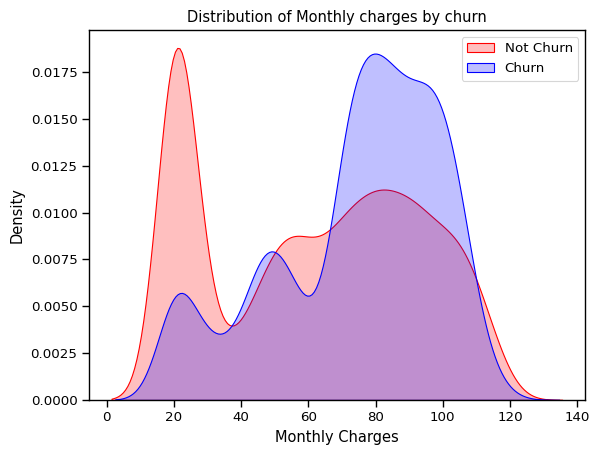

In [22]:
# Monthly Charges Distribution

sns.set_context("paper", font_scale = 1.1)

ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color = "Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax = ax, color = "Blue", shade = True);

ax.legend(["Not Churn","Churn"],loc = 'upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of Monthly charges by churn');

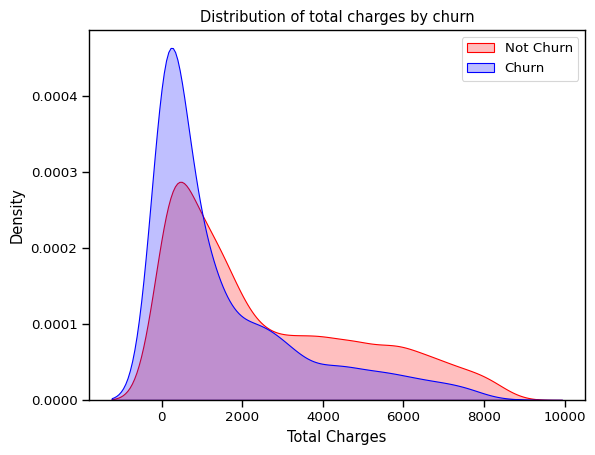

In [23]:
# Distribution of Total Charges

ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color = "Red", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax = ax, color = "Blue", shade = True);

ax.legend(["Not Churn","Churn"],loc = 'upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [24]:
# Tenure vs Churn Box Plot

fig = px.box(df, x='Churn', y = 'tenure')

fig.update_yaxes(title_text = 'Tenure (Months)', row = 1, col = 1)
fig.update_xaxes(title_text = 'Churn', row = 1, col = 1)

fig.update_layout(autosize=True, width = 650, height = 500, title_text ='<b>Tenure vs Churn</b>')
fig.show()

New customers are more likely to churn.

<b>Correlation Heatmap for numerical columns</b>

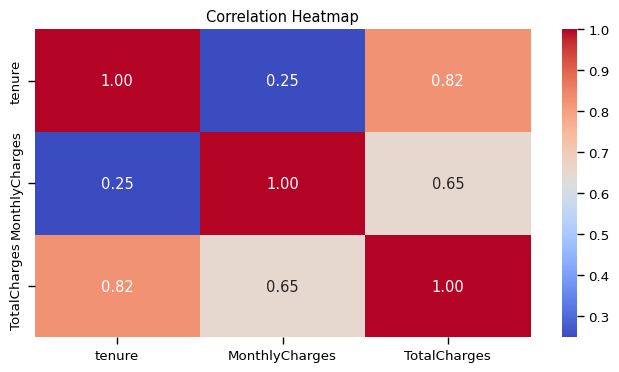

In [25]:
plt.figure(figsize = (8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

<b>Categorical Features - Analysis</b>

In [26]:
# Customer contract distribution Histogram
fig = px.histogram(df, x = "Churn", color = "Contract", barmode = "group", title = "<b>Customer contract distribution<b>")
fig.update_layout(width = 650, height = 400, bargap = 0.2)
fig.show()

Around 75% of Customers with Month-to-month contract tend to churn as compared to customrs with One year contract and with Two year contract.

In [27]:
# Payment Method Distribution Donut Char

labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data = [go.Pie(labels = labels, values = values, hole = .4)])
fig.update_layout(width = 650, height = 400, title_text="<b>Payment Method Distribution</b>")
fig.show()

In [28]:
# Payment Method Distribution with respect to Churn

fig = px.histogram(data_frame = df, x = "Churn", color="PaymentMethod")
fig.update_layout(width = 650, height = 400, bargap = 0.2, title_text = "<b>Payment Method distribution w.r.t. Churn</b>")
fig.show()

Customers with Electronic check tend to churn more than those with Credit card, Bank Transfer and Mailed check.

In [29]:
# Customer Dependents Histogram

fig = px.histogram(df, x = "Churn", color = "Dependents", barmode = "group")
fig.update_layout(width = 650, height = 400, bargap = 0.2, title_text = "<b>Dependents distribution</b>")
fig.show()

Customers without dependents are more likely to churn.

In [30]:
# Churn distribution with respect to Customer Partners

fig = px.histogram(df, x = "Churn", color = "Partner", barmode = "group")
fig.update_layout(width = 650, height = 400, bargap = 0.2, title_text = "<b>Churn distribution w.r.t. Partners</b>")
fig.show()

Customers without partners are more likely to churn.

In [31]:
# Churning with respect to Online Security

fig = px.histogram(df, x = "Churn", color = "OnlineSecurity", barmode = "group")
fig.update_layout(width = 650, height = 400, bargap = 0.2, title_text = "<b>Churn w.r.t Online Security</b>")
fig.show()

Most customers churn in the absence of Online Security.

In [32]:
# Churning with respect to Tech Support

fig = px.histogram(df, x = "Churn", color = "TechSupport", barmode = "group")
fig.update_layout(width = 650, height = 400, bargap = 0.2, title_text = "<b>Churn w.r.t Tech Support</b>")
fig.show()

Customers with no Tech Support are most likely to churn.

### Data Preprocessing

In [33]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [34]:
# Label Encoding of Target Column

df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [35]:
# Identifying Categorical Columns

categorical_columns = df.select_dtypes(include = "object").columns
print(categorical_columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [36]:
# Applying Label Encoding to all categorical variables and saving it as a pickle file for future prediction

from sklearn.preprocessing import LabelEncoder
import pickle

encoders = {}

for column in categorical_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [37]:
encoders

{'gender': LabelEncoder(),
 'SeniorCitizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [38]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Training and Testing Split

In [39]:
X = df.drop(columns = ["Churn"])
Y = df["Churn"]

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)

In [41]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4930, 19) (2113, 19) (4930,) (2113,)


## Data Resampling

In [42]:
print(Y_train.value_counts())

Churn
0    3622
1    1308
Name: count, dtype: int64


As we can see the target column is not properly balanced. We will use <b>Synthetic Minority Oversampling Technique</b> to fix this.

In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)

In [44]:
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [45]:
print(Y_train.value_counts())

Churn
0    3622
1    3622
Name: count, dtype: int64


## Model Training

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report

In [47]:
# Dictionary of models

models = {
    "Decision Tree": DecisionTreeClassifier(random_state = 42),
    "Random Forest": RandomForestClassifier(random_state = 42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability = True, random_state = 42),
    "AdaBoost": AdaBoostClassifier(random_state = 42),
    "Gradient Boosting": GradientBoostingClassifier(random_state = 42),
    "Logistic Regression": LogisticRegression(max_iter = 1000, random_state = 42),
    "XGBoost": XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 42)
}

In [48]:
# Dictionary to save CV scores

cv_scores = {}

# Performing K-Fold Cross Validation for every model

for model_name, model in models.items():
    print(f"Training {model_name} with specified parameters")
    scores = cross_val_score(model, X_train, Y_train, cv = 5, scoring = "accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross validation accuracy is: {np.mean(scores):.2f}")
    print("-" * 60)

Training Decision Tree with specified parameters
Decision Tree cross validation accuracy is: 0.78
------------------------------------------------------------
Training Random Forest with specified parameters
Random Forest cross validation accuracy is: 0.84
------------------------------------------------------------
Training Naive Bayes with specified parameters
Naive Bayes cross validation accuracy is: 0.78
------------------------------------------------------------
Training K-Nearest Neighbors with specified parameters
K-Nearest Neighbors cross validation accuracy is: 0.77
------------------------------------------------------------
Training Support Vector Machine with specified parameters
Support Vector Machine cross validation accuracy is: 0.64
------------------------------------------------------------
Training AdaBoost with specified parameters
AdaBoost cross validation accuracy is: 0.81
------------------------------------------------------------
Training Gradient Boosting wit

We got higher accuracy while using Random Forest and XGBoost models compared to other.

In [49]:
# Making predictions using Random Forest

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, Y_train)

Y_pred_rfc = rfc.predict(X_test)


# Making predictions using XGBoost

xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 42)
xgb.fit(X_train, Y_train)

Y_pred_xgb = xgb.predict(X_test)

## Model Evaluation

In [50]:
print(f"Accuracy Score of Random Forest Model: {accuracy_score(Y_test, Y_pred_rfc):.2f}")
print("Classification Report of Random Forest Model \n", classification_report(Y_test, Y_pred_rfc))

Accuracy Score of Random Forest Model: 0.78
Classification Report of Random Forest Model 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1552
           1       0.58      0.57      0.58       561

    accuracy                           0.78      2113
   macro avg       0.71      0.71      0.71      2113
weighted avg       0.78      0.78      0.78      2113



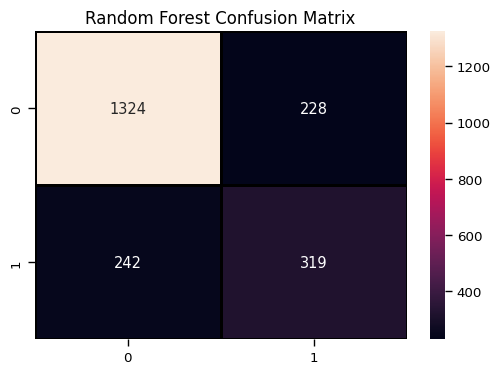

In [51]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(Y_test, Y_pred_rfc),
                annot = True, fmt = "d", linecolor = "k", linewidths = 2)

plt.title("Random Forest Confusion Matrix", fontsize = 12)
plt.show()

In [52]:
print(f"Accuracy Score of XGBoost Model: {accuracy_score(Y_test, Y_pred_xgb):.2f}")
print("Classification Report of XGBoost Model \n", classification_report(Y_test, Y_pred_xgb))

Accuracy Score of XGBoost Model: 0.76
Classification Report of XGBoost Model 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1552
           1       0.55      0.56      0.56       561

    accuracy                           0.76      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.76      0.76      0.76      2113



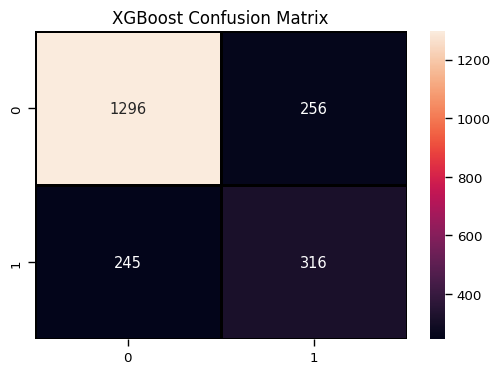

In [53]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(Y_test, Y_pred_xgb),
                annot = True, fmt = "d", linecolor = "k", linewidths = 2)

plt.title("XGBoost Confusion Matrix", fontsize = 12)
plt.show()

### Conclusion

From the Random Forest confusion matrix:

- True Negatives (1322): Customers correctly predicted to stay.

- False Positives (230): Customers incorrectly predicted to churn.

- False Negatives (238): Churned customers missed by the model.

- True Positives (323): Customers correctly identified as likely to churn.

This reflects the model’s strength in retaining accuracy across both classes, especially in detecting customers at risk of churning (class 1), which is key to proactive customer retention.



By integrating this predictive model into the customer lifecycle management process, companies can:

- Identify at-risk customers early

- Offer personalized incentives or support

- Reduce churn rates

- Improve long-term revenue and customer loyalty